<a href="https://colab.research.google.com/github/jlee932/congressional-analysis/blob/main/GSB521_Group_Project_(USE_THIS_COPY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alan Mondragon alan.mondra95@gmail.com
Joseph Lee jlee932cp@gmail.com

#Hypothesis

From Professor Pierce's analysis, we can see that the majority of households earning over $200k were Democratic districts.

Hypothesis: We believe that householders in the age group of 44-64 make more than householders in the 25 and under and 25-44 age groups.
Of those age groups we believe that householders in the Democratic party tend to make more than those in the Republican party. Lastly, we believe the Householders that make less than 10k will have a more even distribution.

This type of analysis could aid those in higher levels of government by helping them to target certain age groups at different levels of income. 

# Links to explain the meaning of householder.

In [ ]:
#https://www.census.gov/programs-surveys/cps/technical-documentation/subject-definitions.html#:~:text=is%20not%20related.-,Householder,%2C%20boarders%2C%20or%20paid%20employees.
#https://www2.census.gov/programs-surveys/acs/tech_docs/user_notes/Family_Equalization_2006.pdf


# We begin by importing our libraries and the ACS Household data. 

In [ ]:
# first some initial setup of libraries we will be using
import pandas as pd # this is the main library used in python for manipulating data. 
import json # this is a library to parse json (javascript object notation)
from urllib.request import urlopen # library to read data from a URL
import matplotlib.pyplot as plt # visualization library we will use that integrates with pandas
import numpy as np


# Importing ACS Housholder data 

#Householders over 200k

In [ ]:
# We are reading in the data we want from ACS 2021. The API returns json data. Try copy and pasting the link yourself in a browser to see what the raw data looks like.
url2 = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19037_018E,B19037_035E,B19037_052E,B19037_002E,B19037_019E,B19037_036E&for=congressional%20district:*&in=state:*"
#"https://api.census.gov/data/2021/acs/acs1?get=NAME,B19037_001E,B19037_002E,B19037_019E,B19037_036E&for=congressional%20district:*&in=state:*"

response2 = urlopen(url2)

data_json2 = json.loads(response2.read())
data_json2.pop(0)


['NAME',
 'B19001_001E',
 'B19037_018E',
 'B19037_035E',
 'B19037_052E',
 'B19037_002E',
 'B19037_019E',
 'B19037_036E',
 'state',
 'congressional district']

In [ ]:
cols2 =  ['District Name','Total Households','Householder under 25 more than 200k','Householder 25 to 44 more than 200k','Householder 44 to 65 more than 200k','Total under 25','Total 25 to 44','Total 44 to 65','State code','district number']

acs_df2 = pd.DataFrame(data_json2,columns=cols2)

acs_df2[['District', 'State']] = acs_df2['District Name'].str.split(',', expand=True)
acs_df2['district number'] = pd.to_numeric(acs_df2['district number'])

acs_df2['State'] = acs_df2['State'].str.strip() # Strips the white space


# Keeping the columns we need
acs_df2 = acs_df2[['Total Households','Householder under 25 more than 200k','Householder 25 to 44 more than 200k','Householder 44 to 65 more than 200k','Total under 25','Total 25 to 44','Total 44 to 65','State','district number']]

# Looking at the top 5 of our data
acs_df2.head()  

,Total Households,Householder under 25 more than 200k,Householder 25 to 44 more than 200k,Householder 44 to 65 more than 200k,Total under 25,Total 25 to 44,Total 44 to 65,State,district number
0,289474,61,4855,12155,7242,79258,116959,Michigan,10
1,299804,0,3220,6059,10513,95489,110749,Mississippi,4
2,278057,68,6094,9511,6806,91322,101709,Michigan,14
3,306685,0,2308,6188,11400,75716,108782,Michigan,1
4,285554,20,3302,5792,12516,87665,103129,Mississippi,3


In [ ]:

# Converting data into numeric.
acs_df2["Total Households"] = pd.to_numeric(acs_df2["Total Households"])
acs_df2["Total under 25"] = pd.to_numeric(acs_df2["Total under 25"])
acs_df2["Total 25 to 44"] = pd.to_numeric(acs_df2["Total 25 to 44"])
acs_df2["Total 44 to 65"] = pd.to_numeric(acs_df2["Total 44 to 65"])
acs_df2["Householder under 25 more than 200k"] = pd.to_numeric(acs_df2["Householder under 25 more than 200k"])
acs_df2["Householder 25 to 44 more than 200k"] = pd.to_numeric(acs_df2["Householder 25 to 44 more than 200k"])
acs_df2["Householder 44 to 65 more than 200k"] = pd.to_numeric(acs_df2["Householder 44 to 65 more than 200k"])

# Compute some new columns based on the existing columns for later visualization
acs_df2[' % of Householder under 25 more than 200k'] = (100*acs_df2['Householder under 25 more than 200k'])/acs_df2['Total under 25']
acs_df2['% of Householder 25 to 44 more than 200k'] = (100*acs_df2['Householder 25 to 44 more than 200k'])/acs_df2['Total 25 to 44']
acs_df2['% of Householder 44 to 65 more than 200k'] = (100*acs_df2['Householder 44 to 65 more than 200k'])/acs_df2['Total 44 to 65']


# Sanity checking data 
acs_df2.head()


,Total Households,Householder under 25 more than 200k,Householder 25 to 44 more than 200k,Householder 44 to 65 more than 200k,Total under 25,Total 25 to 44,Total 44 to 65,State,district number,% of Householder under 25 more than 200k,% of Householder 25 to 44 more than 200k,% of Householder 44 to 65 more than 200k
0,289474,61,4855,12155,7242,79258,116959,Michigan,10,0.842309,6.125565,10.392531
1,299804,0,3220,6059,10513,95489,110749,Mississippi,4,0.000000,3.372116,5.470930
2,278057,68,6094,9511,6806,91322,101709,Michigan,14,0.999118,6.673091,9.351188
3,306685,0,2308,6188,11400,75716,108782,Michigan,1,0.000000,3.048233,5.688441
4,285554,20,3302,5792,12516,87665,103129,Mississippi,3,0.159795,3.766612,5.616267


# Householder under 10k

In [ ]:
URL = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19037_003E,B19037_020E,B19037_037E,B19037_002E,B19037_019E,B19037_036E&for=congressional%20district:*&in=state:*"

response4 = urlopen(URL)

data_json4 = json.loads(response4.read())
data_json4.pop(0)


['NAME',
 'B19001_001E',
 'B19037_003E',
 'B19037_020E',
 'B19037_037E',
 'B19037_002E',
 'B19037_019E',
 'B19037_036E',
 'state',
 'congressional district']

In [ ]:
cols4 =  ['District Name','Total Households','Householder under 25 less than 10k','Householder 25 to 44 less than 10k','Householder 44 to 65 less than 10k','Total under 25','Total 25 to 44','Total 44 to 65','State code','district number']

acs_df4 = pd.DataFrame(data_json4,columns=cols4)

acs_df4[['District', 'State']] = acs_df4['District Name'].str.split(',', expand=True)
acs_df4['district number'] = pd.to_numeric(acs_df4['district number'])

acs_df4['State'] = acs_df4['State'].str.strip() # Strips the white space


# Keeping the columns we need
acs_df4 = acs_df4[['Total Households','Householder under 25 less than 10k','Householder 25 to 44 less than 10k','Householder 44 to 65 less than 10k','Total under 25','Total 25 to 44','Total 44 to 65','State','district number']]

# Looking at the top 5 of our data
acs_df4.head()  


,Total Households,Householder under 25 less than 10k,Householder 25 to 44 less than 10k,Householder 44 to 65 less than 10k,Total under 25,Total 25 to 44,Total 44 to 65,State,district number
0,289474,379,2935,5949,7242,79258,116959,Michigan,10
1,299804,834,6824,11033,10513,95489,110749,Mississippi,4
2,278057,793,8025,11115,6806,91322,101709,Michigan,14
3,306685,1218,3735,7634,11400,75716,108782,Michigan,1
4,285554,2854,9018,7847,12516,87665,103129,Mississippi,3


In [ ]:
# Converting data into numeric.
acs_df4["Total Households"] = pd.to_numeric(acs_df4["Total Households"])
acs_df4["Total under 25"] = pd.to_numeric(acs_df4["Total under 25"])
acs_df4["Total 25 to 44"] = pd.to_numeric(acs_df4["Total 25 to 44"])
acs_df4["Total 44 to 65"] = pd.to_numeric(acs_df4["Total 44 to 65"])
acs_df4["Householder under 25 less than 10k"] = pd.to_numeric(acs_df4["Householder under 25 less than 10k"])
acs_df4["Householder 25 to 44 less than 10k"] = pd.to_numeric(acs_df4["Householder 25 to 44 less than 10k"])
acs_df4["Householder 44 to 65 less than 10k"] = pd.to_numeric(acs_df4["Householder 44 to 65 less than 10k"])

# Compute some new columns based on the existing columns for later visualization
acs_df4['% of Householder under 25 less than 10k'] = (100*acs_df4['Householder under 25 less than 10k'])/acs_df4['Total under 25']
acs_df4['% of Householder 25 to 44 less than 10k'] = (100*acs_df4['Householder 25 to 44 less than 10k'])/acs_df4['Total 25 to 44']
acs_df4['% of Householder 44 to 65 less than 10k'] = (100*acs_df4['Householder 44 to 65 less than 10k'])/acs_df4['Total 44 to 65']

# Sanity checking data 
acs_df4.head()

,Total Households,Householder under 25 less than 10k,Householder 25 to 44 less than 10k,Householder 44 to 65 less than 10k,Total under 25,Total 25 to 44,Total 44 to 65,State,district number,% of Householder under 25 less than 10k,% of Householder 25 to 44 less than 10k,% of Householder 44 to 65 less than 10k
0,289474,379,2935,5949,7242,79258,116959,Michigan,10,5.233361,3.703096,5.086398
1,299804,834,6824,11033,10513,95489,110749,Mississippi,4,7.933035,7.146373,9.962167
2,278057,793,8025,11115,6806,91322,101709,Michigan,14,11.651484,8.787587,10.928236
3,306685,1218,3735,7634,11400,75716,108782,Michigan,1,10.684211,4.932907,7.017705
4,285554,2854,9018,7847,12516,87665,103129,Mississippi,3,22.802812,10.286888,7.608917


#Importing Congressional data

In [ ]:
# read from the congressional data and put into a pandas dataframe
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

# extract the district number from the data (it was in the format of 5th and we want that to just be 5) using a regular expression.
party_df['district number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['district number'] = party_df['district number'].fillna(0)
party_df['district number'] = pd.to_numeric(party_df['district number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip() # remove extraneous whitespace

# Let's just keep the columns we need
party_df = party_df[['State', 'Party', "district number"]]

party_df.head(5)

,State,Party,district number
0,Louisiana,R,5
1,North Carolina,D,12
2,Alabama,R,4
3,California,D,31
4,Georgia,R,12


#Check if each dataset is correct

In [ ]:
party_df['State'].value_counts()

California                  53
Texas                       36
New York                    27
Florida                     27
Pennsylvania                18
Illinois                    18
Ohio                        16
Michigan                    14
Georgia                     14
North Carolina              13
New Jersey                  12
Virginia                    11
Washington                  10
Indiana                      9
Arizona                      9
Tennessee                    9
Massachusetts                9
Minnesota                    8
Missouri                     8
Maryland                     8
Wisconsin                    8
Colorado                     7
Alabama                      7
South Carolina               7
Louisiana                    6
Kentucky                     6
Oklahoma                     5
Oregon                       5
Connecticut                  5
Nevada                       4
Kansas                       4
Arkansas                     4
Iowa    

In [ ]:
acs_df4['State'].value_counts()

California              53
Texas                   36
Florida                 27
New York                27
Illinois                18
Pennsylvania            18
Ohio                    16
Georgia                 14
Michigan                14
North Carolina          13
New Jersey              12
Virginia                11
Washington              10
Indiana                  9
Massachusetts            9
Arizona                  9
Tennessee                9
Missouri                 8
Wisconsin                8
Minnesota                8
Maryland                 8
South Carolina           7
Alabama                  7
Colorado                 7
Kentucky                 6
Louisiana                6
Connecticut              5
Oklahoma                 5
Oregon                   5
Iowa                     4
Kansas                   4
Arkansas                 4
Mississippi              4
Nevada                   4
Utah                     4
New Mexico               3
West Virginia            3
N

In [ ]:
acs_df2['State'].value_counts()

California              53
Texas                   36
Florida                 27
New York                27
Illinois                18
Pennsylvania            18
Ohio                    16
Georgia                 14
Michigan                14
North Carolina          13
New Jersey              12
Virginia                11
Washington              10
Indiana                  9
Massachusetts            9
Arizona                  9
Tennessee                9
Missouri                 8
Wisconsin                8
Minnesota                8
Maryland                 8
South Carolina           7
Alabama                  7
Colorado                 7
Kentucky                 6
Louisiana                6
Connecticut              5
Oklahoma                 5
Oregon                   5
Iowa                     4
Kansas                   4
Arkansas                 4
Mississippi              4
Nevada                   4
Utah                     4
New Mexico               3
West Virginia            3
N

There are 435 total rows, which matches up with the number of congress members in the 116th congress. 

#Merging the datasets

In [ ]:
from pandas.core.reshape.merge import merge
# merged_df = pd.merge(acs_df, party_df, on=["State", "district number"])

merge2 = merge(acs_df2,party_df)
merge3 = merge(merge2,acs_df4)


# Checking  if datasets merged correctly

In [ ]:
#merge2.describe()
merge3.head()

,Total Households,Householder under 25 more than 200k,Householder 25 to 44 more than 200k,Householder 44 to 65 more than 200k,Total under 25,Total 25 to 44,Total 44 to 65,State,district number,% of Householder under 25 more than 200k,% of Householder 25 to 44 more than 200k,% of Householder 44 to 65 more than 200k,Party,Householder under 25 less than 10k,Householder 25 to 44 less than 10k,Householder 44 to 65 less than 10k,% of Householder under 25 less than 10k,% of Householder 25 to 44 less than 10k,% of Householder 44 to 65 less than 10k
0,289474,61,4855,12155,7242,79258,116959,Michigan,10,0.842309,6.125565,10.392531,R,379,2935,5949,5.233361,3.703096,5.086398
1,299804,0,3220,6059,10513,95489,110749,Mississippi,4,0.000000,3.372116,5.470930,R,834,6824,11033,7.933035,7.146373,9.962167
2,278057,68,6094,9511,6806,91322,101709,Michigan,14,0.999118,6.673091,9.351188,D,793,8025,11115,11.651484,8.787587,10.928236
3,306685,0,2308,6188,11400,75716,108782,Michigan,1,0.000000,3.048233,5.688441,R,1218,3735,7634,10.684211,4.932907,7.017705
4,285554,20,3302,5792,12516,87665,103129,Mississippi,3,0.159795,3.766612,5.616267,R,2854,9018,7847,22.802812,10.286888,7.608917


# Visualizations to test our hypothesis.





We've decided to remove Libertarians.

In [ ]:
R = merge3[merge3['Party'].str.contains('R')]["Total Households"].values.tolist()
D = merge3[merge3['Party'].str.contains('D')]["Total Households"].values.tolist()
L = merge3[merge3['Party'].str.contains('L')]["Total Households"].values.tolist()

agegroup = ['Householder under 25 more than 200k','Householder 25 to 44 more than 200k','Householder 44 to 65 more than 200k']


In [ ]:
under_25 = merge3.groupby('Party')[' % of Householder under 25 more than 200k'].median()
between_25_to_44 = merge3.groupby('Party')['% of Householder 25 to 44 more than 200k'].median()
between_44_to_65 = merge3.groupby('Party')['% of Householder 44 to 65 more than 200k'].median()

republican = [under_25['R'], between_25_to_44['R'], between_44_to_65['R']]
democrat = [under_25['D'], between_25_to_44['D'], between_44_to_65['D']]

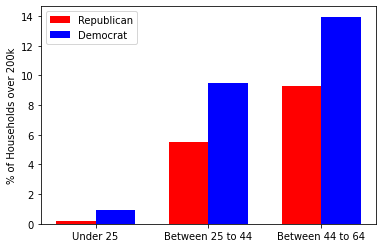

In [ ]:
width = 0.35
age_groups = ['Under 25', 'Between 25 to 44', 'Between 44 to 64']
x = np.arange(len(age_groups))

fig, ax = plt.subplots()

bar1 = ax.bar(x - width / 2, republican, width, label = 'Republican', color='red')
bar2 = ax.bar(x + width / 2, democrat, width, label = 'Democrat', color='blue')


ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.legend()

ax.set_ylabel('% of Households over 200k')

plt.show()

In [ ]:
R = merge3[merge3['Party'].str.contains('R')]["Total Households"].values.tolist()
D = merge3[merge3['Party'].str.contains('D')]["Total Households"].values.tolist()
L = merge3[merge3['Party'].str.contains('L')]["Total Households"].values.tolist()

agegroup2 = ['% of Householder under 25 less than 10k','Householder 25 to 44 less than 10k','Householder 44 to 65 less than 10k']


In [ ]:
under_25 = merge3.groupby('Party')['% of Householder under 25 less than 10k'].median()
between_25_to_44 = merge3.groupby('Party')['% of Householder 25 to 44 less than 10k'].median()
between_44_to_65 = merge3.groupby('Party')['% of Householder 44 to 65 less than 10k'].median()

republican = [under_25['R'], between_25_to_44['R'], between_44_to_65['R']]
democrat = [under_25['D'], between_25_to_44['D'], between_44_to_65['D']]

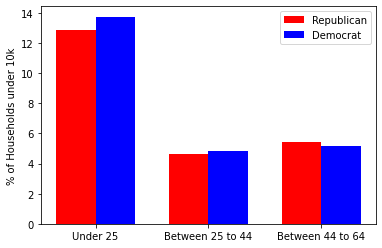

In [ ]:
width = 0.35
age_groups = ['Under 25', 'Between 25 to 44', 'Between 44 to 64']
x = np.arange(len(age_groups))

fig, ax = plt.subplots()

bar1 = ax.bar(x - width / 2, republican, width, label = 'Republican', color='red')
bar2 = ax.bar(x + width / 2, democrat, width, label = 'Democrat', color='blue')


ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.legend()

ax.set_ylabel('% of Households under 10k')

plt.show()

In [ ]:
merge4 = merge3[merge3['Party'] != "L"]
merge4.describe()

,Total Households,Householder under 25 more than 200k,Householder 25 to 44 more than 200k,Householder 44 to 65 more than 200k,Total under 25,Total 25 to 44,Total 44 to 65,district number,% of Householder under 25 more than 200k,% of Householder 25 to 44 more than 200k,% of Householder 44 to 65 more than 200k,Householder under 25 less than 10k,Householder 25 to 44 less than 10k,Householder 44 to 65 less than 10k,% of Householder under 25 less than 10k,% of Householder 25 to 44 less than 10k,% of Householder 44 to 65 less than 10k
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,292477.410138,119.414747,9312.967742,14596.769585,10976.426267,96026.493088,106802.447005,10.175115,1.344676,9.421290,13.419915,1628.714286,4914.898618,6014.281106,14.139264,5.174016,5.704436
std,33709.431023,202.475062,8162.749573,9276.630507,5292.000836,19998.376951,11749.928028,10.663517,2.610309,7.340705,8.034822,1246.366324,2318.671338,2320.890597,7.027880,2.386429,2.315490
min,183319.000000,0.000000,1087.000000,2441.000000,1052.000000,56953.000000,69556.000000,0.000000,0.000000,1.556860,2.422468,0.000000,812.000000,1589.000000,0.000000,1.250560,1.428404
25%,273664.500000,0.000000,4038.000000,7666.750000,6994.500000,82024.250000,99392.750000,3.000000,0.000000,4.425987,7.498813,701.250000,3342.000000,4377.750000,8.775521,3.542456,4.108221
50%,292530.000000,45.000000,6646.000000,11979.000000,10395.000000,92343.000000,107721.500000,6.000000,0.391688,7.047082,11.219902,1325.500000,4445.500000,5671.000000,13.442473,4.706121,5.262496
75%,312015.750000,146.000000,11799.250000,19015.250000,14095.250000,106599.000000,113824.000000,13.000000,1.679619,11.702268,17.409511,2271.000000,6012.750000,7077.250000,18.790236,6.441662,6.765696
max,448949.000000,1662.000000,58218.000000,54887.000000,32827.000000,178555.000000,150792.000000,53.000000,27.370227,48.789038,51.298978,8903.000000,15705.000000,16695.000000,46.673004,16.582373,15.547009


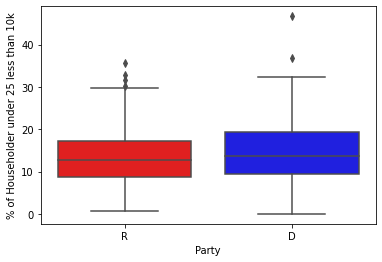

In [ ]:
import seaborn as sns

my_pal = {"R": "Red", "D": "Blue"}

  
sns.boxplot( x=merge4["Party"], y=merge4["% of Householder under 25 less than 10k"], palette=my_pal)

plt.show()


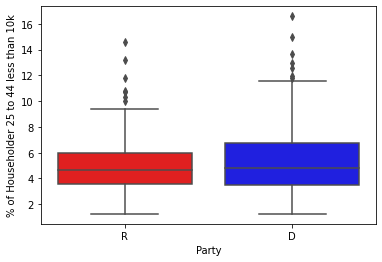

In [ ]:
my_pal = {"R": "Red", "D": "Blue"}

  
sns.boxplot( x=merge4["Party"], y=merge4["% of Householder 25 to 44 less than 10k"], palette=my_pal)

plt.show()

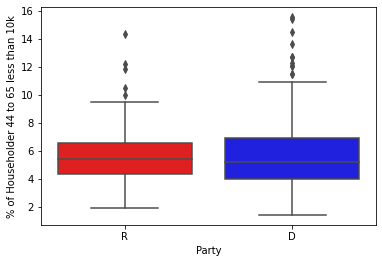

In [ ]:
my_pal = {"R": "Red", "D": "Blue"}

  
sns.boxplot( x=merge4["Party"], y=merge4["% of Householder 44 to 65 less than 10k"], palette=my_pal)

plt.show()

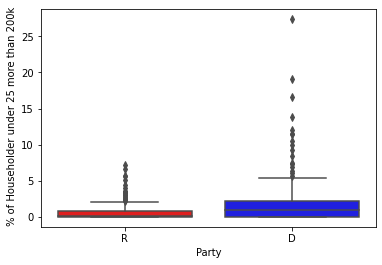

In [ ]:
my_pal = {"R": "Red", "D": "Blue"}

  
sns.boxplot( x=merge4["Party"], y=merge4[" % of Householder under 25 more than 200k"], palette=my_pal)

plt.show() 

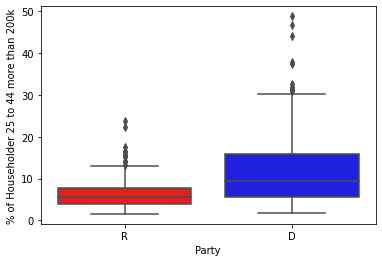

In [ ]:
my_pal = {"R": "Red", "D": "Blue"}

  
sns.boxplot( x=merge4["Party"], y=merge4["% of Householder 25 to 44 more than 200k"], palette=my_pal)

plt.show() 

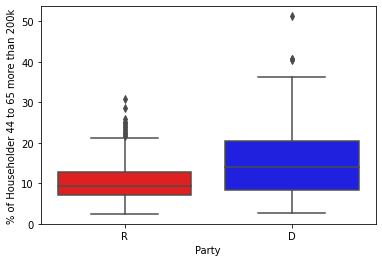

In [ ]:
my_pal = {"R": "Red", "D": "Blue"}

  
sns.boxplot( x=merge4["Party"], y=merge4["% of Householder 44 to 65 more than 200k"], palette=my_pal)

plt.show() 

Conclusion: Based on our analysis, we found that there tend to be more householders that make over 200k in the Democratic party when compared to the Repulican party. Our analysis also confirmed that the age group 44-64 had more householders who earned over 200k when compared to the other age groups. Lastly, we found that there tends to be a more even spread when we comparing the Democratic and Republican parties that have householders who make less than 10k.

While there are some outliers in all 6 of our boxplots, most of the households for the 3 age groups are around the mean. The most extreme outliers tended to be on the Democratic side of householders earning over 200k. These were mainly households from 25 to 44 from California, Silicon Valley, and this area has a high concentration of householders earning over 200k.

The means of all age groups confirms our hypothesis that most households earning over 200k were from the 44 to 65 age group. The standard deviation of 8.03 suggests that the data are more spread out for this age group, but may have been influenced by outliers.